In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('geo.xlsx')
data

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1
...,...,...,...,...
108801,108801,37.454528,55.792331,-1
108802,108802,37.384325,55.899068,-1
108803,108803,37.421066,55.848756,1
108804,108804,37.448509,55.793065,-1


In [3]:
X = data.iloc[:, 1:3]
X

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794
...,...,...
108801,37.454528,55.792331
108802,37.384325,55.899068
108803,37.421066,55.848756
108804,37.448509,55.793065


In [4]:
y = data.comment_class
y

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
108801   -1
108802   -1
108803    1
108804   -1
108805   -1
Name: comment_class, Length: 108806, dtype: int64

In [5]:
#стандартизация координат
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

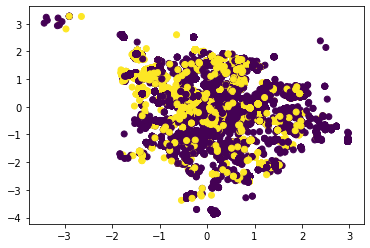

In [6]:
#сами данные
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

In [7]:
#число кластеров без подбора
km = KMeans(n_clusters=7)
km_fitted = km.fit_predict(X_scaled)

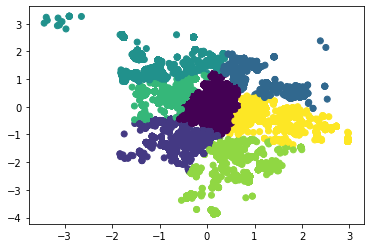

In [8]:
#визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
fig, ax = plt.subplots()
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=km_fitted)
plt.show()

In [9]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [10]:
#функция из лекции для оценки качества 
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [11]:
#выборка голосов за
df_pros = data.loc[data.comment_class == 1]
df_pros_X = df_pros.iloc[:, 1:3]
df_pros_X

,x,y
28,37.588916,55.741982
45,37.589311,55.734273
46,37.558526,55.728758
47,37.566431,55.731794
61,37.589311,55.734273
...,...,...
108797,37.421066,55.848756
108798,37.430902,55.851298
108799,37.451249,55.836620
108800,37.454528,55.792331


In [12]:
#стандарттизация координат для выборки голосов за
scaler_2 = StandardScaler()
df_pros_scaled = scaler.fit_transform(df_pros_X)
df_pros_scaled

array([[-0.16701157, -0.66683515],
       [-0.1640515 , -0.79116702],
       [-0.3947497 , -0.88011374],
       ...,
       [-1.19866757,  0.85950028],
       [-1.17409523,  0.14520085],
       [-1.42485448,  1.05523145]])

In [13]:
#кластеризация выборки голосов за
km1 = KMeans(n_clusters=5)
km1_fitted = km1.fit_predict(df_pros_scaled)
km1_fitted

array([0, 0, 0, ..., 2, 2, 2])

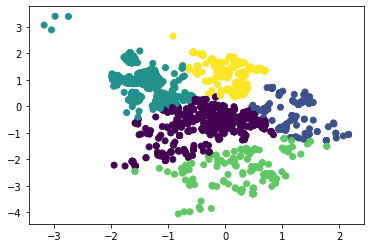

In [14]:
fig, ax = plt.subplots()
ax.scatter(df_pros_scaled[:, 0], df_pros_scaled[:, 1], c=km1_fitted)

In [15]:
#кластеризация другим алгоритмом
db = DBSCAN()
db_fitted = db.fit_predict(df_pros_scaled)

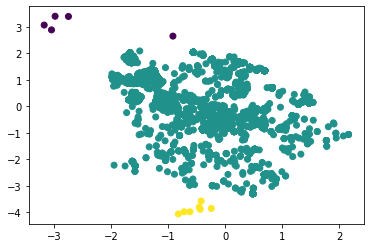

In [16]:
fig, ax = plt.subplots()
ax.scatter(df_pros_scaled[:, 0], df_pros_scaled[:, 1], c=db_fitted)

In [17]:
k_inertia = []
ks = range(1,13)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_pros_scaled)
    k_inertia.append(clf_kmeans.inertia_)

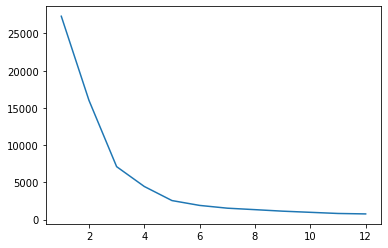

In [18]:
plt.plot(ks, k_inertia)

По графику можно предположить, что оптимальное число кластеров 5-7